## DETERMINAR CANTIDAD DE DATOS FALTANTES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''lista de archivos a leer'''
lis_arch = ['obs_diario_pp.csv','obs_diario_tmax.csv','obs_diario_tmin.csv','obs_diario_tmed.csv',\
            'obs_diario_hmax.csv','obs_diario_hmin.csv','obs_diario_hmed.csv']
nom = ['precipitacion','temp_max','temp_min','temp_med','hum_max','hum_min','hum_med']

'''Se crea un data frame vacío para almacenar los resúmenes de todas las variables '''
temp = pd.read_csv('../datos/por_variables/obs_diario_pp.csv', sep=',')

In [3]:
'''Datos faltantes respecto a la variable precipitación'''
pp=temp.drop(columns='fecha', axis=0)
is_null_df = pp.isnull()

'Los valores claros indican datos faltantes de precipitación'

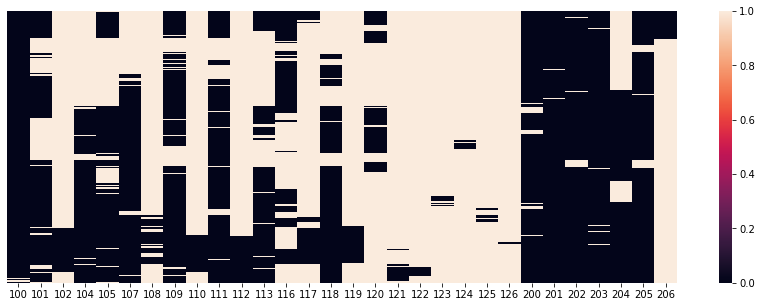

In [4]:
'''Gráfica de Datos faltantes respecto a la variable precipitación'''
fig =plt.figure(figsize=(15,5))
ax = plt.gca()
sns.heatmap(is_null_df,ax=ax)
plt.tick_params(labelleft=False, left=False)
'''Los valores claros indican datos faltantes de precipitación'''

In [6]:
sel =pd.DataFrame(columns=temp.columns)
sel.rename(columns = {'fecha':'variable'}, inplace = True)

'''Se define una fecha de inicio y una fecha de finalización'''
ini ='1981-01-01'
fin ='2020-12-31'
for p in lis_arch:
    pin ='../datos/por_variables/' + p
    df = pd.read_csv(pin, sep=',')
    '''Establecer rango de fechas'''
    df['fecha']=pd.to_datetime(df['fecha'])
    df=df[(df['fecha']>=ini) & (df['fecha']<fin)]
    total = df.shape[0]
    nulos = (df.isnull().sum()) * 100 / total
    sel = sel.append([nulos], ignore_index=True)    
sel = sel.assign(variable=nom)
sel.drop(columns='fecha', axis=0, inplace = True)
sel=sel.T
sel.columns=sel.iloc[0,:]
sel.drop('variable', axis=0, inplace=True)
sel=sel.reset_index()
sel.rename(columns = {'index':'ID'}, inplace = True)
df=pd.read_csv('../datos/estaciones_senamhi_generado.csv', sep=',')
sel['estacion']=df['estacion'].astype(str)
nulos=sel[sel['precipitacion']<=10]
nulos=nulos.sort_values('precipitacion').reset_index(drop=True)
for i in range(1,8):
    nulos.iloc[:,i] = nulos.iloc[:,i].apply(lambda x: round(x, 2))
nulos

variable,ID,precipitacion,temp_max,temp_min,temp_med,hum_max,hum_min,hum_med,estacion
0,201,0.99,1.55,1.49,10.81,11.03,100.00,10.81,ayoayo
1,203,1.10,1.62,1.51,1.66,13.05,13.05,13.05,calacoto
2,100,1.33,2.95,2.07,76.83,61.52,61.52,37.42,aeropuerto
3,202,3.19,100.00,100.00,100.00,100.00,100.00,100.00,berenguela
4,205,5.50,100.00,100.00,100.00,100.00,100.00,100.00,conchamarca
5,200,6.19,35.54,35.48,35.56,37.04,37.04,37.05,achiri
